In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from GetAprilTrainTestData import GetAprilTrainTestData
from sklearn.ensemble import RandomForestRegressor

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
X_raw, y = GetAprilTrainTestData()

13413 13413


In [4]:
# Now need to one hot encode all the stuff in X that is categorical. 
X = pd.get_dummies(X_raw)
print("Shape", X.shape)

Shape (13413, 3947)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
print(len(X_train), len(y_train), len(X_test), len(y_test))

10059 10059 3354 3354


In [6]:
regr = RandomForestRegressor(random_state=0, n_estimators=400, n_jobs=-1, min_samples_leaf = 5)
regr.fit(X_train, np.concatenate(y_train, axis=0))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
score = regr.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.694301669012809


In [8]:
len(regr.feature_importances_)

3947

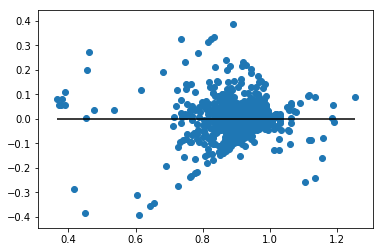

In [9]:
predictions = regr.predict(X_test)
plt.scatter(predictions, predictions - np.concatenate(y_test, axis=0))
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

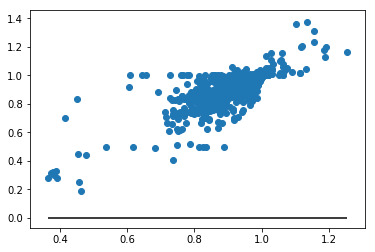

In [10]:
plt.scatter(predictions, np.concatenate(y_test, axis=0))
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [11]:
out_df=pd.DataFrame(X_test)
out_df.columns=X.columns
out_df["MSYE"] = list(np.concatenate(y_test, axis=0))
out_df["Predictions"] = predictions
out_df.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl80_1,TESTERHEAD_vl81_1,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1,MSYE,Predictions
20042,48.6,665,2880,1,1,1,1,1,1,0.998,...,0,0,0,0,0,0,0,0,0.986,0.985842
15876,15.5,224,2278,0,1,1,1,1,1,0.999,...,0,0,0,0,0,0,0,0,0.780,0.858396
28664,2.1,190,1752,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0.990,0.990171
17675,1.5,694,6042,0,1,1,1,1,1,0.998,...,0,0,0,0,0,0,0,0,0.921,0.923120
12546,16.2,477,1080,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0.997,0.992754


In [12]:
out_df.to_csv("data/product_test_data_RandomForest.csv")